In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('title.txt')
df1

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [3]:
df2 = pd.read_csv('rating.txt' , sep='\t' , names=['user_id' , 'item_id' , 'rating' , 'timestamp'])
df2

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
86144,537,430,3,886031297
86145,546,109,5,885141260
86146,691,182,5,875543228
86147,887,118,5,881378289


In [4]:
movie = pd.merge(df1 , df2 , on='item_id' )
movie.drop(['timestamp'] , axis=1 , inplace=True)
movie.sample(5)

,item_id,title,user_id,rating
4063,28,Apollo 13 (1995),487,4
54778,477,Matilda (1996),887,1
48950,405,Mission: Impossible (1996),569,3
18296,151,Willy Wonka and the Chocolate Factory (1971),221,1
20746,172,"Empire Strikes Back, The (1980)",291,5


In [5]:
movie['title'] = movie['title'].str.replace('\(.*\)','').str.strip()

In [6]:
movie.groupby('title')['rating'].mean()

title
'Til There Was You                2.333333
1-900                             2.000000
101 Dalmatians                    2.956044
12 Angry Men                      4.301887
187                               3.054054
                                    ...   
Young Guns II                     2.944444
Young Poisoner's Handbook, The    3.294118
Zeus and Roxanne                  2.250000
unknown                           3.714286
Á köldum klaka                    3.000000
Name: rating, Length: 1638, dtype: float64

In [7]:
movie.groupby('title')['rating'].count()

title
'Til There Was You                  9
1-900                               3
101 Dalmatians                     91
12 Angry Men                      106
187                                37
                                 ... 
Young Guns II                      36
Young Poisoner's Handbook, The     34
Zeus and Roxanne                    4
unknown                             7
Á köldum klaka                      1
Name: rating, Length: 1638, dtype: int64

In [8]:
rating = pd.DataFrame(movie.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You,2.333333
1-900,2.000000
101 Dalmatians,2.956044
12 Angry Men,4.301887
187,3.054054


In [9]:
rating['num_rating'] = pd.DataFrame(movie.groupby('title')['rating'].count())

In [10]:
rating.head()

,rating,num_rating
title,,
'Til There Was You,2.333333,9
1-900,2.000000,3
101 Dalmatians,2.956044,91
12 Angry Men,4.301887,106
187,3.054054,37


In [11]:
plt.style.use('seaborn-dark')

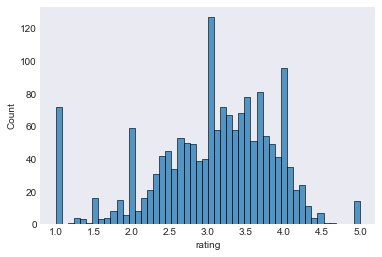

In [12]:
sns.histplot(data=rating , x='rating' ,  bins=50);

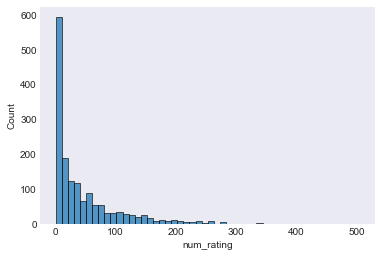

In [13]:
sns.histplot(data=rating , x='num_rating' ,bins=50);

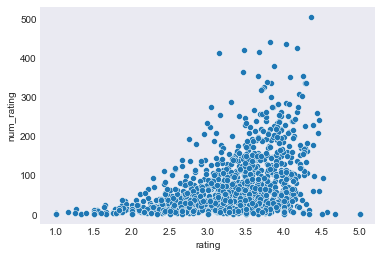

In [14]:
sns.scatterplot(data=rating , x='rating' , y='num_rating');

In [15]:
movie_matx = movie.pivot_table(index='user_id' , columns='title' , values='rating' , fill_value=0)
movie_matx.sample(10)

title,'Til There Was You,1-900,101 Dalmatians,12 Angry Men,187,2 Days in the Valley,"20,000 Leagues Under the Sea",2001: A Space Odyssey,3 Ninjas: High Noon At Mega Mountain,"39 Steps, The",...,Wyatt Earp,Yankee Zulu,Year of the Horse,Young Frankenstein,Young Guns,Young Guns II,"Young Poisoner's Handbook, The",Zeus and Roxanne,unknown,Á köldum klaka
user_id,,,,,,,,,,,,,,,,,,,,,
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,5,0,0,4,3,0,0,...,0,0,0,4,4,2,0,0,0,0


In [16]:
def similar_movie(movie_name):
    corr = movie_matx.corrwith(movie_matx[movie_name])
    similar =  pd.DataFrame(corr , columns=['corr'])
    similar = similar.join(rating['num_rating'])
    similar = similar.dropna()
    return similar[similar['num_rating'] > 100].sort_values(['corr','num_rating'] , ascending=False)[1:11]

In [17]:
similar_movie('Star Wars')

,corr,num_rating
title,,
Return of the Jedi,0.577885,436
Raiders of the Lost Ark,0.420765,355
"Empire Strikes Back, The",0.418490,308
Indiana Jones and the Last Crusade,0.356054,282
Blade Runner,0.337779,239
"Godfather, The",0.337176,337
"Terminator, The",0.334381,263
Toy Story,0.328679,380
"Fifth Element, The",0.327179,177


## NearestNeighbors

In [18]:
movie_matx_2 = movie.pivot_table(index='title', columns='user_id'  , values='rating' , fill_value=0)
movie_matx_2.sample(10)

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
Shadowlands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Critical Care,0,0,0,1,0,0,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
Death in Brunswick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tommy Boy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Turning, The",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Flintstones, The",0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Glimmer Man, The",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SubUrbia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mrs. Parker and the Vicious Circle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
model = NearestNeighbors(metric='cosine' , algorithm='brute')

In [30]:
def nearest_neighbors(movie_name , data , top):
    model.fit(data)
    movie = data.loc[movie_name].values.reshape(1,-1)
    distance , indices = model.kneighbors(movie , n_neighbors=top)
    
    
    lis_name = []
    lis_distance = []
    
    for i in range(1 , len(distance.flatten())):
        lis_name.append(movie_matx_2.index[indices.flatten()[i]] )
        lis_distance.append(distance.flatten()[i])
    
    movie_similar = pd.DataFrame(lis_name , lis_distance).reset_index()
    movie_similar.columns = ['distance' , 'title']
    
    return movie_similar
    

In [31]:
nearest_neighbors('Star Wars' , movie_matx_2 , 11)

,distance,title
0,0.223548,Return of the Jedi
1,0.335164,Raiders of the Lost Ark
2,0.358160,"Empire Strikes Back, The"
3,0.377837,Toy Story
4,0.389380,Fargo
5,0.390772,"Godfather, The"
6,0.404726,"Silence of the Lambs, The"
7,0.408038,Indiana Jones and the Last Crusade
8,0.409206,Star Trek: First Contact
9,0.410071,Pulp Fiction
